## Импорт библиотек

In [1]:
import pandas as pd

import copy

import numpy as np

from scipy.stats import spearmanr

from scipy.stats import mannwhitneyu

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## Загрузка данных

In [106]:
wines_db = pd.read_csv('data/winequalityN.csv', sep = ',')

In [107]:
wines_db

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Описание датасета

* Источник: https://www.kaggle.com/datasets/rajyellow46/wine-quality
* Цель: предсказание качества вина (quality) по его хим.составу (задача регрессии)
* Описание атрибутов: type - категориальные данные (тип вина, красное/белое), fixed acidity - числовые дискретные данные (фиксированная кислотность), volatile acidity - числовые непрерывные данные (непостоянная кислотность), citric acid - числовые непрерывные данные (к-ф лимонной кислоты), residual sugar - числовые дискретные данные (остаточный сахар), chlorides - числовые непрерывные данные (к-ф хлорида), free sulfur dioxide - числовые дискретные данные (свободный диоксид серы), total sulfur dioxide - числовые дискретные данные (общее количество диоксида серы), density - числовые непрерывные данные (плотность), pH - числовые непрерывные данные (водородный показатель), sulphates - числовые непрерывные данные (сульфаты), alcohol - числовые дискретные данные (крепость, количество алкоголя), quality - числовые дискретные данные (оценка качества).

## train-test

In [108]:
X = wines_db[['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = wines_db['quality']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
X_train.shape, X_test.shape

((4547, 12), (1950, 12))

## Описательная статистика

In [110]:
X_train.value_counts(subset = 'type').describe()

count       2.000000
mean     2273.500000
std      1680.792819
min      1085.000000
25%      1679.250000
50%      2273.500000
75%      2867.750000
max      3462.000000
dtype: float64

Мы создали сводный датафрейм, показывающий, распределение типов вин. Из описательной статистики видно, что основная масса значений (перцентиль 75%) лежит в диапозоне 1085 - 2867, но при этом среднее значение приблизительно равно 2273, а стандартное отклонение - 1680 (а максимальное значение - 3462). Из этого мы понимаем, что в распредлении существует мода, оно скошенно вправо.

<AxesSubplot: xlabel='type'>

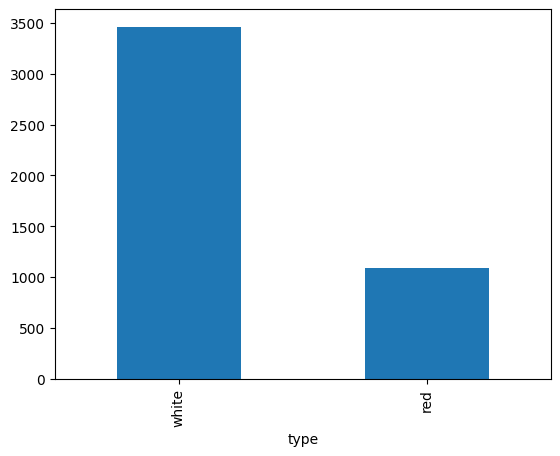

In [111]:
type_distribution = X_train.value_counts(subset = 'type')
type_distribution.plot(kind='bar')

График подтверждает наши выводы. Распределение юнимодальное.

<AxesSubplot: >

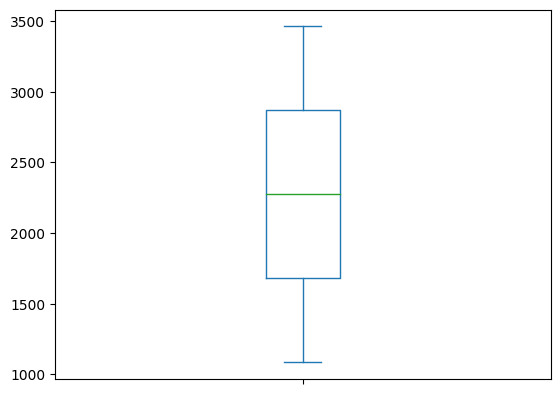

In [112]:
X_train.value_counts(subset = 'type').plot.box()

Выбросов нет

In [113]:
X_train['fixed acidity'].describe()

count    4538.000000
mean        7.201410
std         1.287684
min         3.900000
25%         6.400000
50%         7.000000
75%         7.700000
max        15.900000
Name: fixed acidity, dtype: float64

Мы вывели статистику для показателя фиксированной кислотности вин. Как видим, распределение неравномерное (скошенное вправо). Большая часть значений лежит в диапозоне от 3.9 до 7.7 (75% перцентиль). Среднее значение - 7.2, стандартное отклонение - 1.29, а максимальное значение равняется 15.9.

<AxesSubplot: xlabel='fixed acidity'>

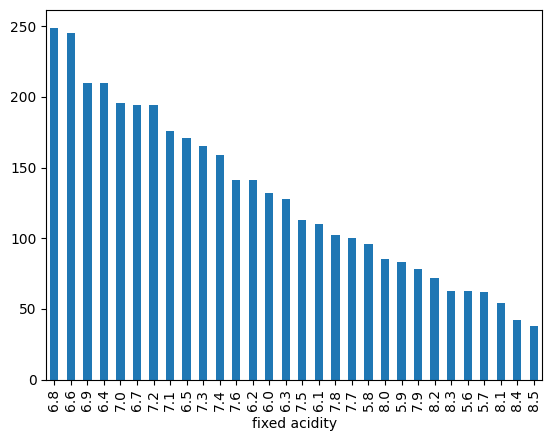

In [114]:
fa_distribution = X_train.value_counts(subset = 'fixed acidity').head(n=30)
fa_distribution.plot(kind='bar')

Как видим, распределение бимодальное (с небольшим приближением)

<AxesSubplot: >

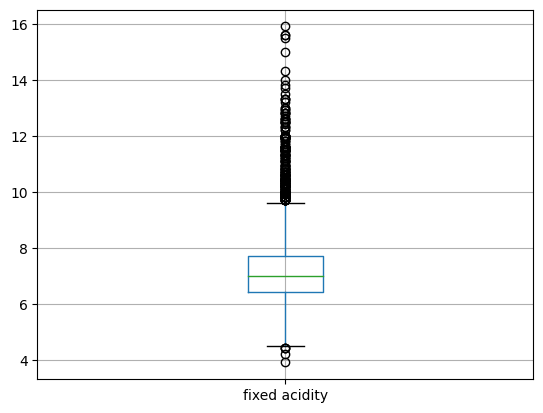

In [115]:
X_train.boxplot('fixed acidity')

Как видим, присутствует большое количество выбросов сверху, и небольшое - снизу.

In [116]:
X_train['volatile acidity'].describe()

count    4539.000000
mean        0.338432
std         0.162344
min         0.080000
25%         0.230000
50%         0.290000
75%         0.400000
max         1.330000
Name: volatile acidity, dtype: float64

Мы вывели статистику для показателя переменной кислотности вин. Как видим, распределение неравномерное (скошенное вправо). Большая часть значений лежит в диапозоне от 0.08 до 0.4 (75% перцентиль). Среднее значение - 0.34, стандартное отклонение - 0.16, максимальное значение равняется 1.33.

<AxesSubplot: xlabel='volatile acidity'>

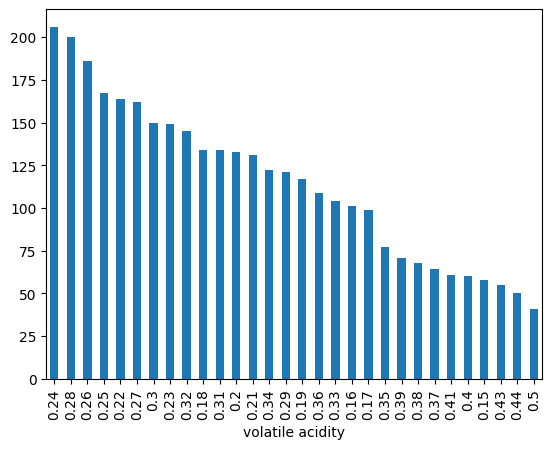

In [117]:
va_distribution = X_train.value_counts(subset = 'volatile acidity').head(n=30)
va_distribution.plot(kind='bar')

Как видим, распределение бимодальное (с небольшим приближением)

<AxesSubplot: >

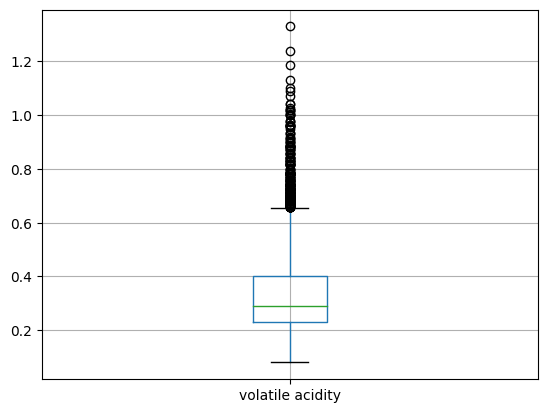

In [118]:
X_train.boxplot('volatile acidity')

Как видим, присутствует большое количество выбросов сверху.

In [120]:
X_train['citric acid'].describe()

count    4545.000000
mean        0.319105
std         0.146018
min         0.000000
25%         0.250000
50%         0.310000
75%         0.390000
max         1.660000
Name: citric acid, dtype: float64

Мы вывели статистику для показателя содержания лимонной кислоты. Как видим, распределение неравномерное (скошенное вправо). Большая часть значений лежит в диапозоне от 0 до 0.39 (75% перцентиль). Среднее значение - 0.32, стандартное отклонение - 0.15, максимальное значение равняется 1.66.

<AxesSubplot: xlabel='citric acid'>

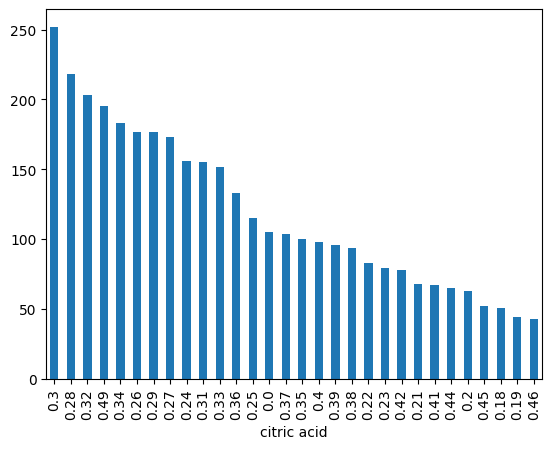

In [121]:
ca_distribution = X_train.value_counts(subset = 'citric acid').head(n=30)
ca_distribution.plot(kind='bar')

Распределение юнимодальное

<AxesSubplot: >

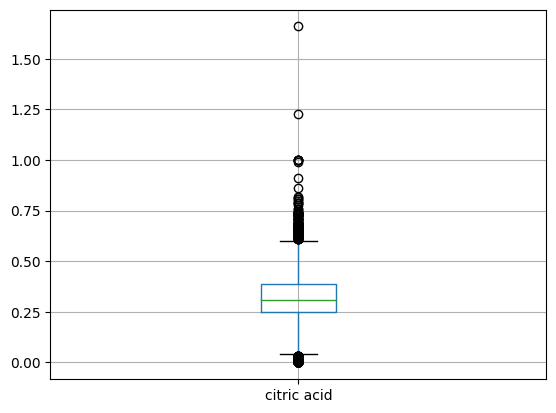

In [122]:
X_train.boxplot('citric acid')

Как видим, присутствует большое количество выбрососв сверху и снизу.

In [123]:
X_train['residual sugar'].describe()

count    4546.000000
mean        5.474538
std         4.772732
min         0.600000
25%         1.800000
50%         3.100000
75%         8.100000
max        65.800000
Name: residual sugar, dtype: float64

Мы вывели статистику для показателя остаточного сахара. Как видим, распределение неравномерное (скошенное вправо). Большая часть значений лежит в диапозоне от 0.6 до 8.1 (75% перцентиль). Среднее значение - 5.47, стандартное отклонение - 4.77, максимальное значение равняется 65.8.

<AxesSubplot: xlabel='residual sugar'>

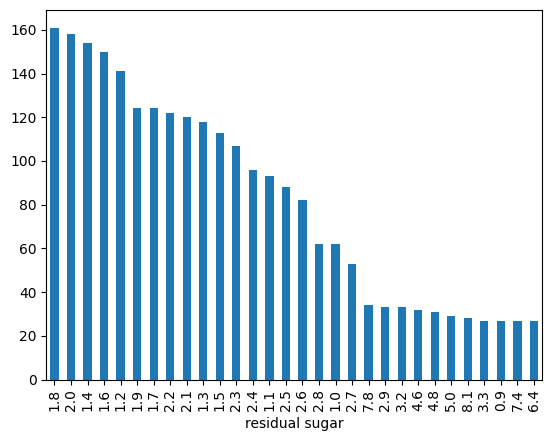

In [124]:
rs_distribution = X_train.value_counts(subset = 'residual sugar').head(n=30)
rs_distribution.plot(kind='bar')

Распределение, с небольшим приближением, можно назвать мультимодальным.

<AxesSubplot: >

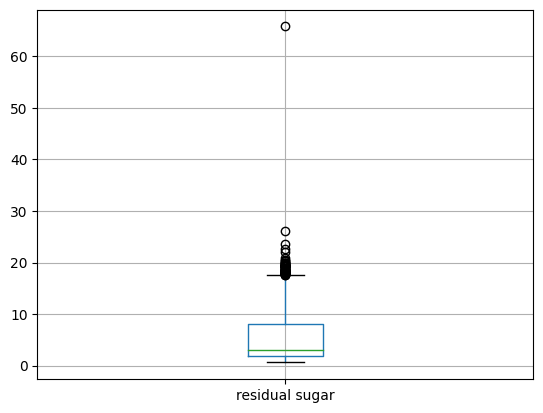

In [125]:
X_train.boxplot('residual sugar')

Как видим, присутствует большое количество выбросов сверху.

In [126]:
X_train['chlorides'].describe()

count    4545.000000
mean        0.055556
std         0.033979
min         0.009000
25%         0.038000
50%         0.047000
75%         0.064000
max         0.610000
Name: chlorides, dtype: float64

Мы вывели статистику для показателя содержания хлоридов. Как видим, распределение неравномерное (скошенное вправо). Большая часть значений лежит в диапозоне от 0.009 до 0.064 (75% перцентиль). Среднее значение - 0.056, стандартное отклонение - 0.034, максимальное значение равняется 0.61.

<AxesSubplot: xlabel='chlorides'>

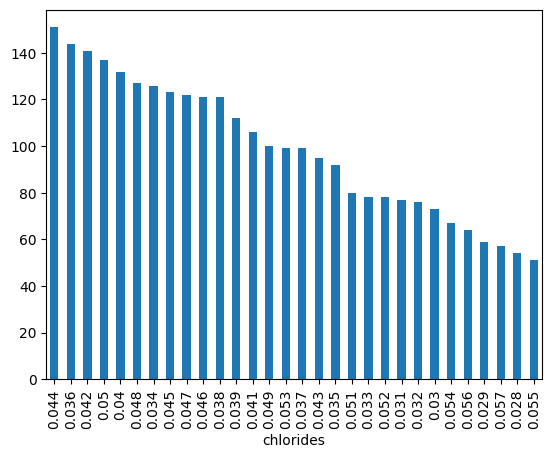

In [127]:
chlorides_distribution = X_train.value_counts(subset = 'chlorides').head(n=30)
chlorides_distribution.plot(kind='bar')

Распределение юнимодальное (но мода не ярко выражена).

<AxesSubplot: >

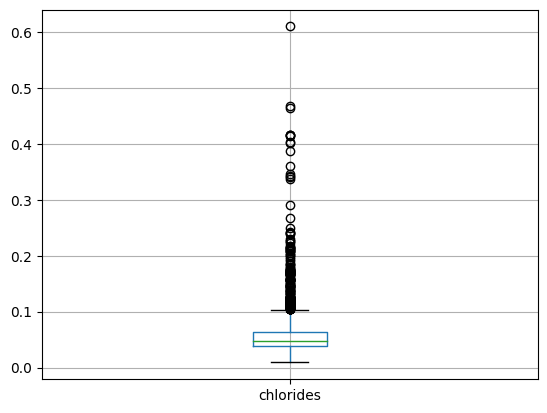

In [128]:
X_train.boxplot('chlorides')

Как видим, присутствует большое количество выбросов сверху.

In [129]:
X_train['free sulfur dioxide'].describe()

count    4547.000000
mean       30.789751
std        17.856596
min         1.000000
25%        17.000000
50%        29.000000
75%        42.000000
max       289.000000
Name: free sulfur dioxide, dtype: float64

Мы вывели статистику для показателя содержания свободного диоксида серы. Как видим, распределение неравномерное (скошенное вправо). Большая часть значений лежит в диапозоне от 1 до 42 (75% перцентиль). Среднее значение - 31, стандартное отклонение - 18, максимальное значение равняется 289.

<AxesSubplot: xlabel='free sulfur dioxide'>

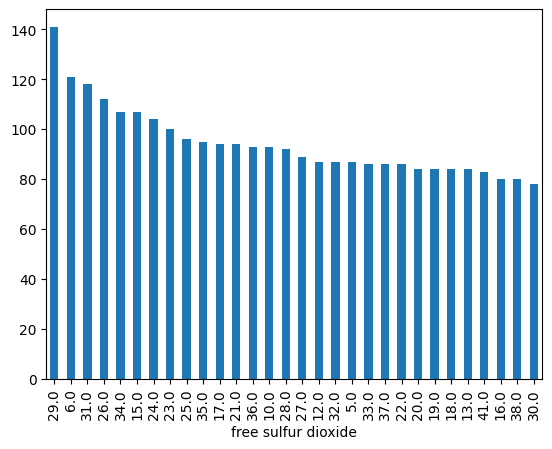

In [130]:
fsd_distribution = X_train.value_counts(subset = 'free sulfur dioxide').head(n=30)
fsd_distribution.plot(kind='bar')

Распределение юнимодальное.

<AxesSubplot: >

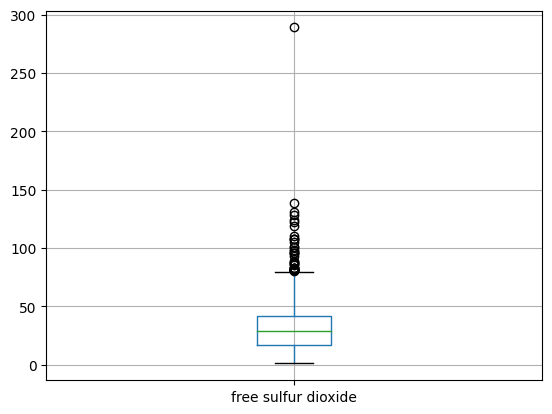

In [131]:
X_train.boxplot('free sulfur dioxide')

Как видим, присутствует большое количество выбросов сверху.

In [132]:
X_train['total sulfur dioxide'].describe()

count    4547.000000
mean      116.141522
std        56.044864
min         6.000000
25%        79.500000
50%       119.000000
75%       156.000000
max       440.000000
Name: total sulfur dioxide, dtype: float64

Мы вывели статистику для показателя общего содержания диоксида серы. Как видим, распределение неравномерное (скошенное вправо). Большая часть значений лежит в диапозоне от 6 до 156 (75% перцентиль). Среднее значение - 116, стандартное отклонение - 56, максимальное значение равняется 440.

<AxesSubplot: xlabel='total sulfur dioxide'>

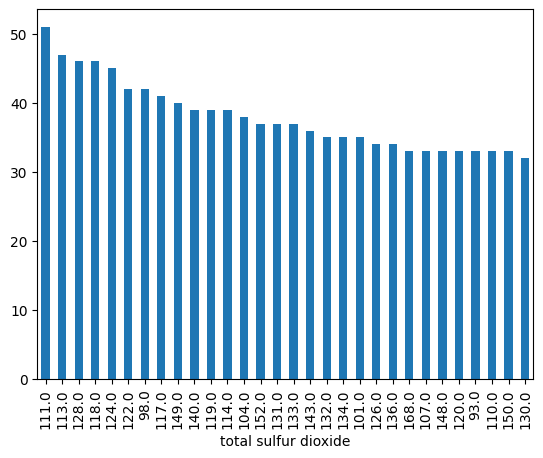

In [133]:
tsd_distribution = X_train.value_counts(subset = 'total sulfur dioxide').head(n=30)
tsd_distribution.plot(kind='bar')

Распределение юнимодальное, мода выражена не ярко.

<AxesSubplot: >

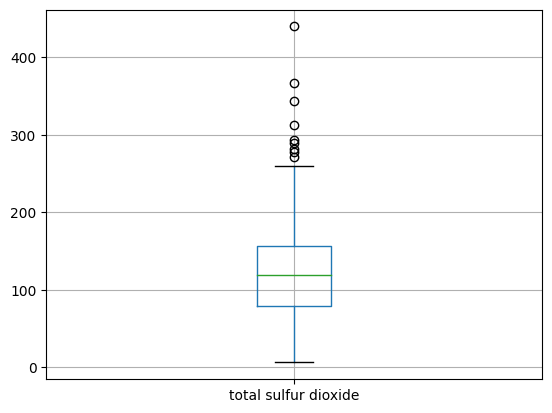

In [134]:
X_train.boxplot('total sulfur dioxide')

Присутствует некоторое количество выбросов сверху.

In [135]:
X_train['density'].describe()

count    4547.000000
mean        0.994652
std         0.003016
min         0.987110
25%         0.992280
50%         0.994800
75%         0.996980
max         1.038980
Name: density, dtype: float64

Мы вывели статистику для показателя плотности. Как видим, распределение неравномерное (скошенное вправо). Большая часть значений лежит в диапозоне от 0.987 до 0.997 (75% перцентиль). Среднее значение - 0.995, стандартное отклонение - 0.003, максимальное значение равняется 1.04.

<AxesSubplot: xlabel='density'>

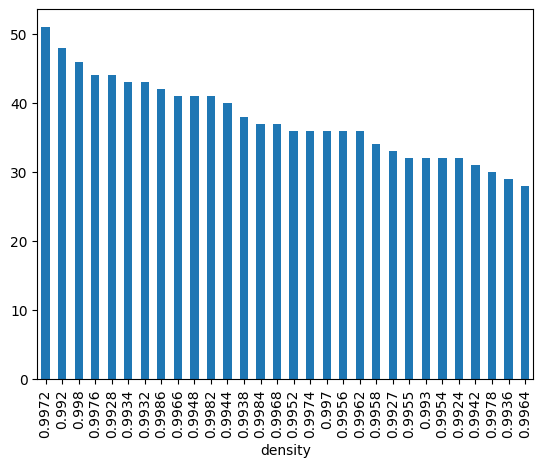

In [136]:
density_distribution = X_train.value_counts(subset = 'density').head(n=30)
density_distribution.plot(kind='bar')

Распределение юнимодальное, мода выражена не ярко.

<AxesSubplot: >

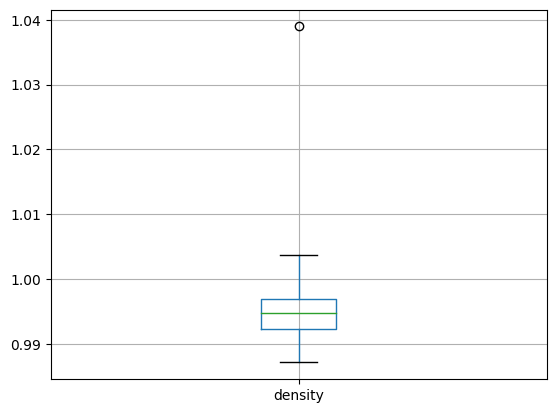

In [137]:
X_train.boxplot('density')

Присутствует один выброс сверху.

In [138]:
X_train['pH'].describe()

count    4541.000000
mean        3.218683
std         0.161561
min         2.740000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

Мы вывели статистику для водородного показателя. Как видим, распределение неравномерное (скошенное вправо). Большая часть значений лежит в диапозоне от 2.74 до 3.32 (75% перцентиль). Среднее значение - 3.22, стандартное отклонение - 0.16, максимальное значение равняется 4.01.

<AxesSubplot: xlabel='pH'>

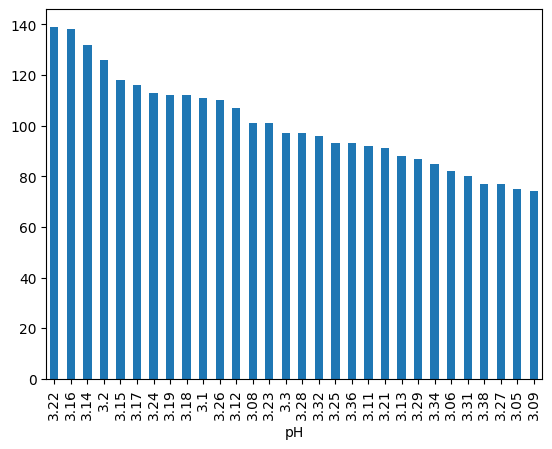

In [139]:
pH_distribution = X_train.value_counts(subset = 'pH').head(n=30)
pH_distribution.plot(kind='bar')

Распределение бимодальное, но моды выражены не ярко.

<AxesSubplot: >

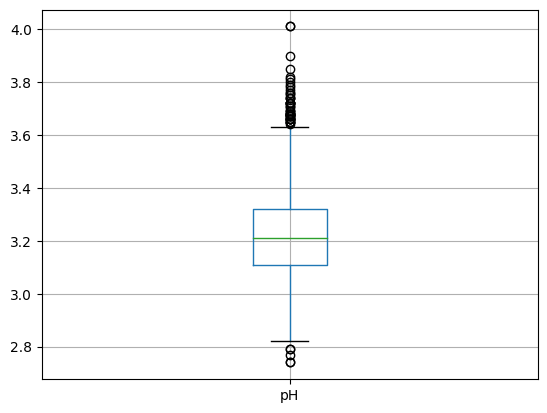

In [140]:
X_train.boxplot('pH')

Присутствует большое количество выбросов сверху и несколько выбросов снизу.

In [141]:
X_train['sulphates'].describe()

count    4543.000000
mean        0.529344
std         0.148182
min         0.220000
25%         0.430000
50%         0.500000
75%         0.600000
max         2.000000
Name: sulphates, dtype: float64

Мы вывели статистику для показателя содержания сульфатов. Как видим, распределение неравномерное (скошенное вправо). Большая часть значений лежит в диапозоне от 0.22 до 0.6 (75% перцентиль). Среднее значение - 0.53, стандартное отклонение - 0.15, максимальное значение равняется 2.

<AxesSubplot: xlabel='sulphates'>

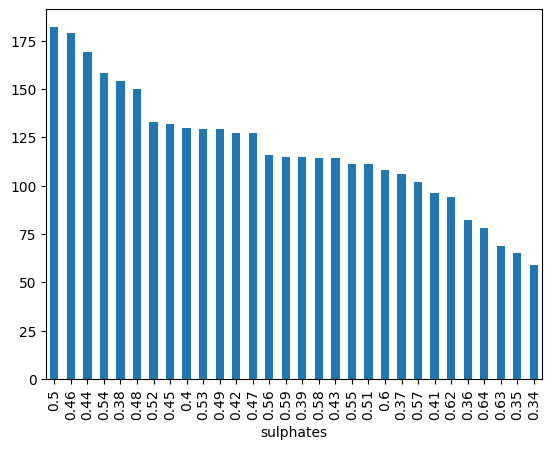

In [142]:
sulphates_distribution = X_train.value_counts(subset = 'sulphates').head(n=30)
sulphates_distribution.plot(kind='bar')

Распределение бимодальное, но моды выражены не ярко.

<AxesSubplot: >

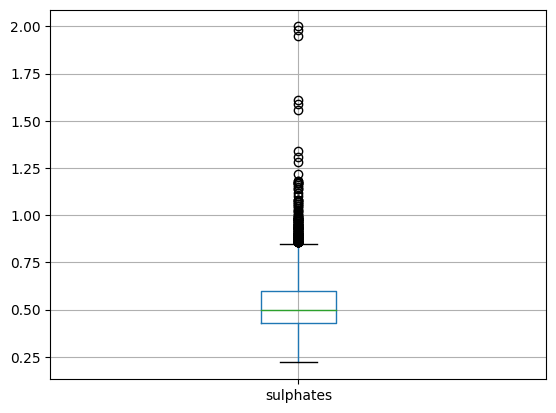

In [143]:
X_train.boxplot('sulphates')

Присутствует большое количество выбросов сверху.

In [144]:
X_train['alcohol'].describe()

count    4547.000000
mean       10.512845
std         1.202475
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

Мы вывели статистику для показателя содержания спирта. Как видим, распределение неравномерное (скошенное вправо). Большая часть значений лежит в диапозоне от 8 до 11.3 (75% перцентиль). Среднее значение - 10.5, стандартное отклонение - 1.2, максимальное значение равняется 14.9.

<AxesSubplot: xlabel='alcohol'>

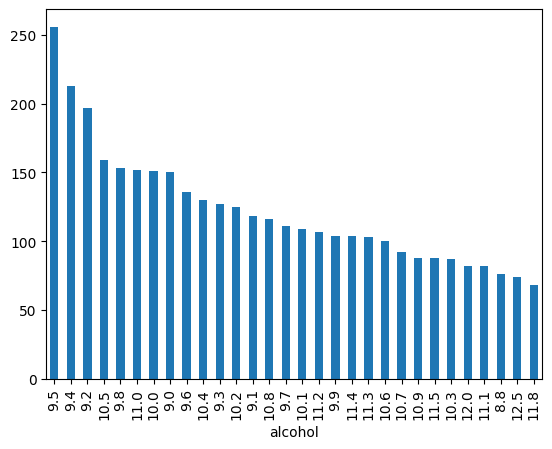

In [145]:
alcohol_distribution = X_train.value_counts(subset = 'alcohol').head(n=30)
alcohol_distribution.plot(kind='bar')

Распределение юнимодальное.

<AxesSubplot: >

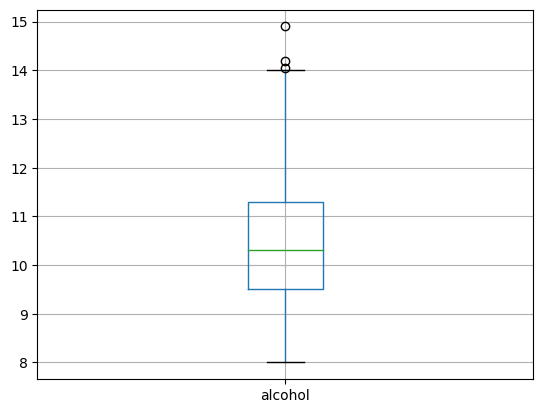

In [146]:
X_train.boxplot('alcohol')

Присутствует несколько выбросов сверху.

In [147]:
y_train.describe()

count    4547.000000
mean        5.824280
std         0.886001
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

Мы вывели статистику распределения оценок. Как видим, распределение неравномерное (скошенное вправо). Большая часть значений лежит в диапозоне от 3 до 6 (75% перцентиль). Среднее значение - 5.8, стандартное отклонение - 0.89, максимальное значение равняется 9.

<AxesSubplot: >

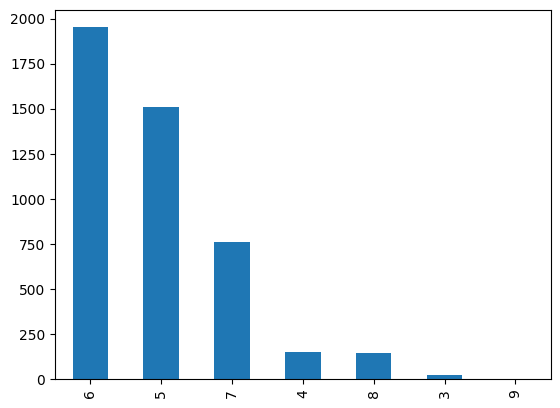

In [148]:
quality_distribution = y_train.value_counts().head(n=30)
quality_distribution.plot(kind='bar')

Распределение юнимодальное.

<AxesSubplot: >

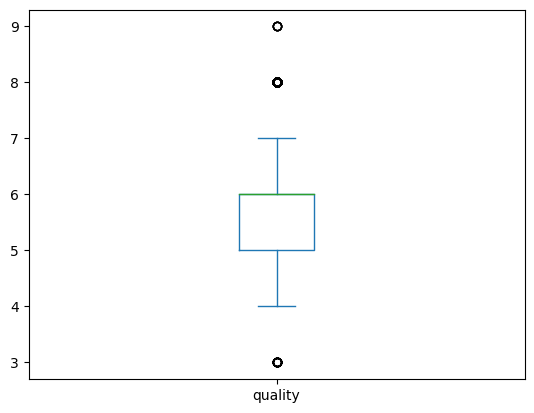

In [149]:
y_train.plot.box()

Присутствуют выбросы сверху и снизу.

## Корреляции

In [150]:
wines_train_corr = copy.deepcopy(X_train)
wines_train_corr['quality'] = copy.deepcopy(y_train)
corr = wines_train_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\mozg2\AppData\Local\Temp\ipykernel_16372\2171886145.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = wines_train_corr.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.225994,0.330752,-0.108590,0.302367,-0.278315,-0.326179,0.455443,-0.255471,0.287962,-0.087524,-0.075220
volatile acidity,0.225994,1.000000,-0.364397,-0.191319,0.379585,-0.358097,-0.416068,0.267019,0.252984,0.236982,-0.028822,-0.255418
citric acid,0.330752,-0.364397,1.000000,0.149719,0.042131,0.135137,0.193096,0.108899,-0.323971,0.053754,-0.005208,0.085689
residual sugar,-0.108590,-0.191319,0.149719,1.000000,-0.122427,0.392783,0.487824,0.562300,-0.260014,-0.187098,-0.363956,-0.042496
chlorides,0.302367,0.379585,0.042131,-0.122427,1.000000,-0.184678,-0.276906,0.367657,0.048923,0.393074,-0.257485,-0.206340
free sulfur dioxide,-0.278315,-0.358097,0.135137,0.392783,-0.184678,1.000000,0.717238,0.027991,-0.133869,-0.179526,-0.182742,0.054969
total sulfur dioxide,-0.326179,-0.416068,0.193096,0.487824,-0.276906,0.717238,1.000000,0.037207,-0.223525,-0.270942,-0.269656,-0.040913
density,0.455443,0.267019,0.108899,0.562300,0.367657,0.027991,0.037207,1.000000,0.013218,0.252972,-0.681501,-0.303468
pH,-0.255471,0.252984,-0.323971,-0.260014,0.048923,-0.133869,-0.223525,0.013218,1.000000,0.200805,0.118100,0.025246
sulphates,0.287962,0.236982,0.053754,-0.187098,0.393074,-0.179526,-0.270942,0.252972,0.200805,1.000000,0.002440,0.033691


Как видим, наиболее коррелирующие с оценками признаки - это volatile acidity, chlorides, density и alcohol.

<AxesSubplot: xlabel='volatile acidity', ylabel='quality'>

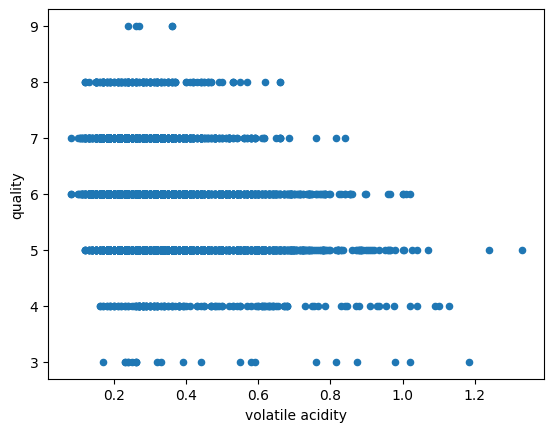

In [151]:
wines_train_corr.plot(x = 'volatile acidity', y = 'quality', kind="scatter")

<AxesSubplot: xlabel='chlorides', ylabel='quality'>

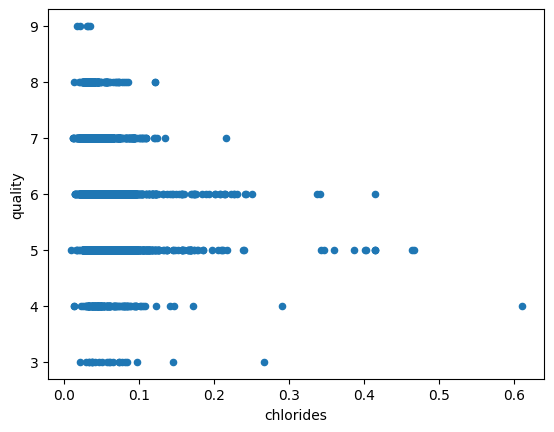

In [152]:
wines_train_corr.plot(x = 'chlorides', y = 'quality', kind="scatter")

<AxesSubplot: xlabel='density', ylabel='quality'>

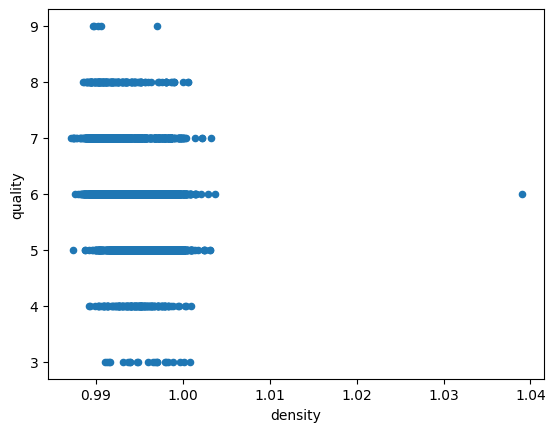

In [153]:
wines_train_corr.plot(x = 'density', y = 'quality', kind="scatter")

<AxesSubplot: xlabel='alcohol', ylabel='quality'>

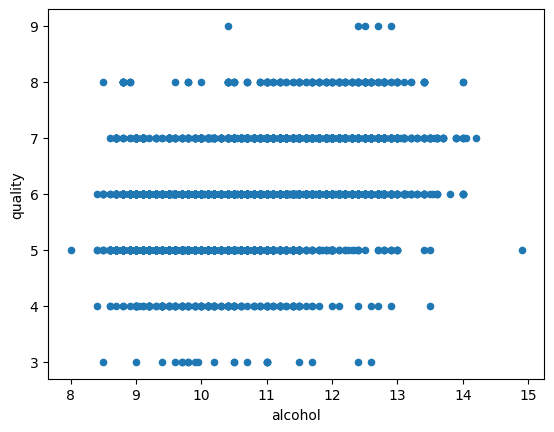

In [154]:
wines_train_corr.plot(x = 'alcohol', y = 'quality', kind="scatter")

## Пропущенные значения

In [155]:
X_train.isnull().sum()

type                    0
fixed acidity           9
volatile acidity        8
citric acid             2
residual sugar          1
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      6
sulphates               4
alcohol                 0
dtype: int64

In [156]:
X_train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'sulphates']] = X_train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'sulphates']].fillna(X_train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'sulphates']].median(axis = 0), axis=0)

Пропущенные значения на тренировочной выборке заполняем медианой.

In [66]:
X_train.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [67]:
X_test.isnull().sum()

type                    0
fixed acidity           1
volatile acidity        0
citric acid             1
residual sugar          1
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      3
sulphates               0
alcohol                 0
dtype: int64

In [68]:
X_test.dropna(inplace=True)

Пропущенные значения на тестовой выборке отбрасываем (для объективности последующей оценки модели).

In [69]:
X_test.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [70]:
y_test = y_test.drop(index = [i for i in y_test.index if i not in X_test.index])

Для тестовой выборки отбрасываем значения целевого параметра, соответствующие отброшенным строкам.

## Выбросы

In [157]:
rows_to_drop = X_train[
    (X_train['fixed acidity'] < X_train['fixed acidity'].quantile(0.005)) | (X_train['fixed acidity'] > X_train['fixed acidity'].quantile(0.995)) | 
    (X_train['volatile acidity'] < X_train['volatile acidity'].quantile(0.005)) | (X_train['volatile acidity'] > X_train['volatile acidity'].quantile(0.995)) | 
    (X_train['citric acid'] < X_train['citric acid'].quantile(0.005)) | (X_train['citric acid'] > X_train['citric acid'].quantile(0.995)) | 
    (X_train['residual sugar'] < X_train['residual sugar'].quantile(0.005)) | (X_train['residual sugar'] > X_train['residual sugar'].quantile(0.995)) | 
    (X_train['chlorides'] < X_train['chlorides'].quantile(0.005)) | (X_train['chlorides'] > X_train['chlorides'].quantile(0.995)) | 
    (X_train['free sulfur dioxide'] < X_train['free sulfur dioxide'].quantile(0.005)) | (X_train['free sulfur dioxide'] > X_train['free sulfur dioxide'].quantile(0.995)) | 
    (X_train['total sulfur dioxide'] < X_train['total sulfur dioxide'].quantile(0.005)) | (X_train['total sulfur dioxide'] > X_train['total sulfur dioxide'].quantile(0.995)) | 
    (X_train['density'] < X_train['density'].quantile(0.005)) | (X_train['density'] > X_train['density'].quantile(0.995)) | 
    (X_train['pH'] < X_train['pH'].quantile(0.005)) | (X_train['pH'] > X_train['pH'].quantile(0.995)) | 
    (X_train['sulphates'] < X_train['sulphates'].quantile(0.005)) | (X_train['sulphates'] > X_train['sulphates'].quantile(0.995)) | 
    (X_train['alcohol']  < X_train['alcohol'].quantile(0.005)) | (X_train['alcohol']  > X_train['alcohol'].quantile(0.995))].index
X_train = X_train.drop(rows_to_drop)

Удаляем выбросы.

In [159]:
y_train = y_train.drop(index = [i for i in y_train.index if i not in X_train.index])

Удаляем значения целевого параметра, соответствующие выбросам.

<AxesSubplot: >

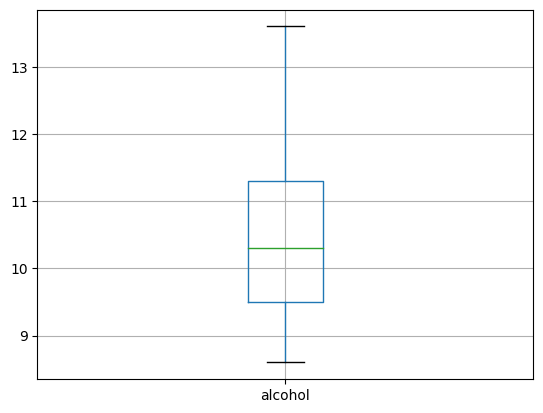

In [160]:
X_train.boxplot('alcohol')

<AxesSubplot: >

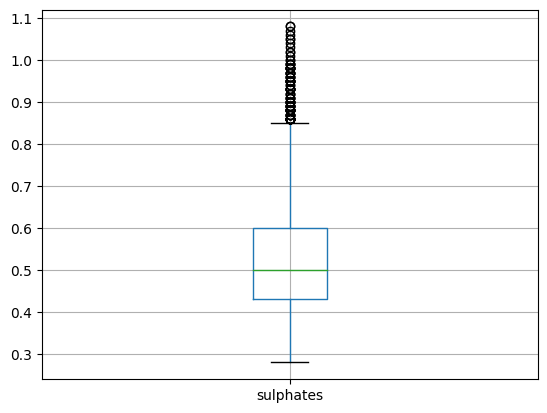

In [161]:
X_train.boxplot('sulphates')

<AxesSubplot: >

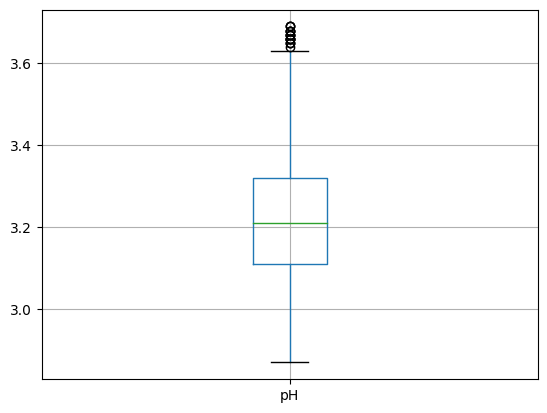

In [162]:
X_train.boxplot('pH')

<AxesSubplot: >

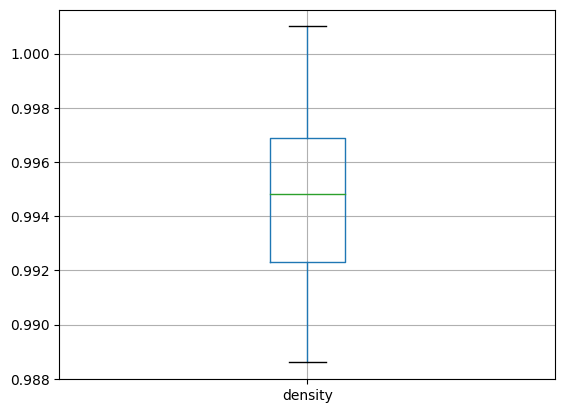

In [163]:
X_train.boxplot('density')

<AxesSubplot: >

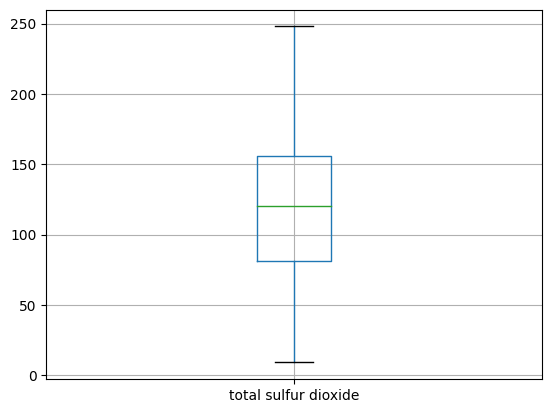

In [164]:
X_train.boxplot('total sulfur dioxide')

<AxesSubplot: >

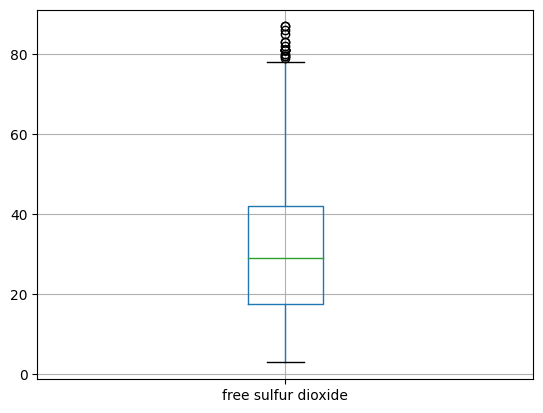

In [165]:
X_train.boxplot('free sulfur dioxide')

<AxesSubplot: >

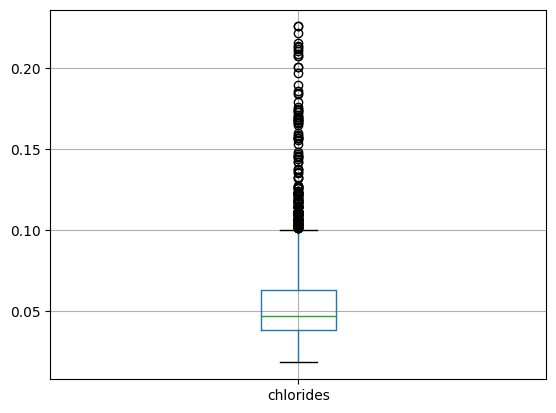

In [166]:
X_train.boxplot('chlorides')

<AxesSubplot: >

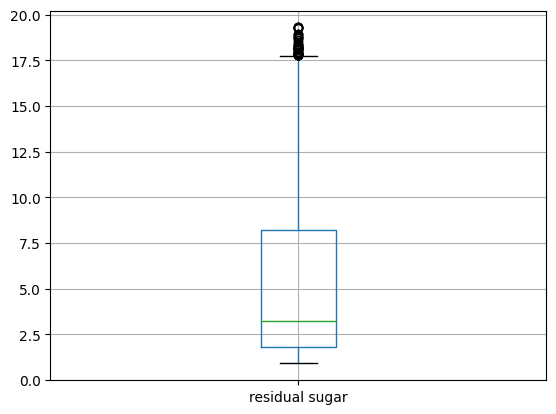

In [167]:
X_train.boxplot('residual sugar')

<AxesSubplot: >

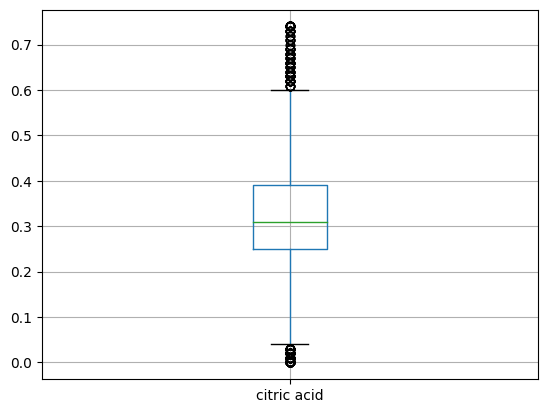

In [168]:
X_train.boxplot('citric acid')

<AxesSubplot: >

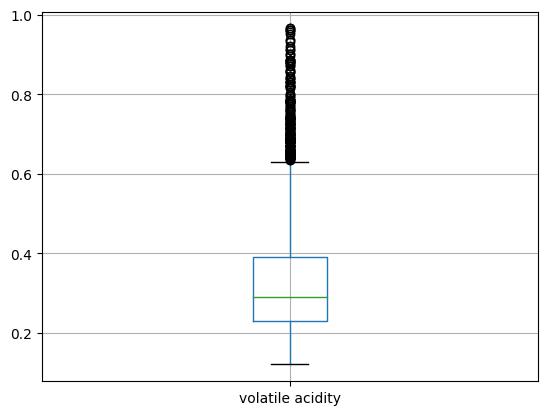

In [169]:
X_train.boxplot('volatile acidity')

<AxesSubplot: >

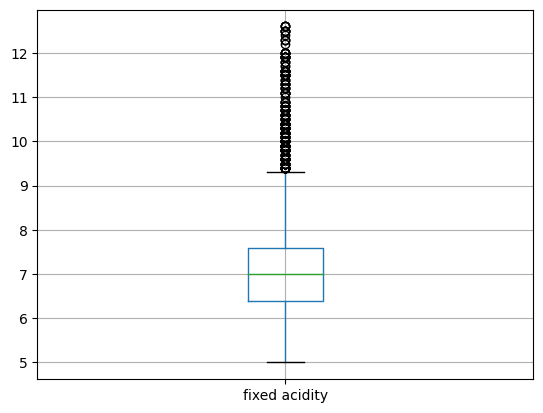

In [170]:
X_train.boxplot('fixed acidity')

## Корреляции x2

In [171]:
wines_train_corr = copy.deepcopy(X_train)
wines_train_corr['quality'] = copy.deepcopy(y_train)
corr = wines_train_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\mozg2\AppData\Local\Temp\ipykernel_16372\2171886145.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = wines_train_corr.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.239161,0.298910,-0.132778,0.353389,-0.286390,-0.335171,0.434032,-0.214295,0.292170,-0.071354,-0.067105
volatile acidity,0.239161,1.000000,-0.406297,-0.209097,0.450234,-0.367987,-0.434298,0.275123,0.270647,0.228668,-0.045024,-0.244377
citric acid,0.298910,-0.406297,1.000000,0.146674,-0.072437,0.167498,0.218664,0.068108,-0.318946,0.026386,0.008283,0.089002
residual sugar,-0.132778,-0.209097,0.146674,1.000000,-0.149929,0.432273,0.501905,0.547698,-0.271779,-0.200175,-0.386988,-0.045084
chlorides,0.353389,0.450234,-0.072437,-0.149929,1.000000,-0.227208,-0.333984,0.447968,0.137129,0.300896,-0.297217,-0.225183
free sulfur dioxide,-0.286390,-0.367987,0.167498,0.432273,-0.227208,1.000000,0.722976,0.047767,-0.159424,-0.193639,-0.190831,0.077299
total sulfur dioxide,-0.335171,-0.434298,0.218664,0.501905,-0.333984,0.722976,1.000000,0.036981,-0.249073,-0.301351,-0.277706,-0.037163
density,0.434032,0.275123,0.068108,0.547698,0.447968,0.047767,0.036981,1.000000,0.046180,0.247448,-0.716078,-0.312008
pH,-0.214295,0.270647,-0.318946,-0.271779,0.137129,-0.159424,-0.249073,0.046180,1.000000,0.255200,0.091582,0.012768
sulphates,0.292170,0.228668,0.026386,-0.200175,0.300896,-0.193639,-0.301351,0.247448,0.255200,1.000000,0.021788,0.048671


## Категориальные значения

In [172]:
X_train['type'] = X_train['type'].map({'white': 1, 'red': 0})

In [173]:
X_test['type'] = X_test['type'].map({'white': 1, 'red': 0})

Заменяем категориальные значения (type) на 0/1.

## Масштабирование

In [174]:
train_index = X_train.index

In [175]:
test_index = X_test.index

In [176]:
scaler = StandardScaler()

In [177]:
X_train = scaler.fit_transform(X_train)

In [178]:
X_test = scaler.transform(X_test)

In [179]:
X_train = pd.DataFrame(X_train, index=train_index, columns=['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])

In [180]:
X_test = pd.DataFrame(X_test, index=test_index, columns = ['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])

В связи с разностью шкал наших признаков, проводим масштабирование.

## Корреляции x3

In [181]:
wines_train_corr = copy.deepcopy(X_train)
wines_train_corr['quality'] = copy.deepcopy(y_train)
corr = wines_train_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.000000,-0.490749,-0.661116,0.217193,0.359597,-0.610919,0.475424,0.713144,-0.388851,-0.349609,-0.483046,0.028380,0.114487
fixed acidity,-0.490749,1.000000,0.239161,0.298910,-0.132778,0.353389,-0.286390,-0.335171,0.434032,-0.214295,0.292170,-0.071354,-0.067105
volatile acidity,-0.661116,0.239161,1.000000,-0.406297,-0.209097,0.450234,-0.367987,-0.434298,0.275123,0.270647,0.228668,-0.045024,-0.244377
citric acid,0.217193,0.298910,-0.406297,1.000000,0.146674,-0.072437,0.167498,0.218664,0.068108,-0.318946,0.026386,0.008283,0.089002
residual sugar,0.359597,-0.132778,-0.209097,0.146674,1.000000,-0.149929,0.432273,0.501905,0.547698,-0.271779,-0.200175,-0.386988,-0.045084
chlorides,-0.610919,0.353389,0.450234,-0.072437,-0.149929,1.000000,-0.227208,-0.333984,0.447968,0.137129,0.300896,-0.297217,-0.225183
free sulfur dioxide,0.475424,-0.286390,-0.367987,0.167498,0.432273,-0.227208,1.000000,0.722976,0.047767,-0.159424,-0.193639,-0.190831,0.077299
total sulfur dioxide,0.713144,-0.335171,-0.434298,0.218664,0.501905,-0.333984,0.722976,1.000000,0.036981,-0.249073,-0.301351,-0.277706,-0.037163
density,-0.388851,0.434032,0.275123,0.068108,0.547698,0.447968,0.047767,0.036981,1.000000,0.046180,0.247448,-0.716078,-0.312008
pH,-0.349609,-0.214295,0.270647,-0.318946,-0.271779,0.137129,-0.159424,-0.249073,0.046180,1.000000,0.255200,0.091582,0.012768


In [182]:
for i in ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']:
       spear_corr, p = spearmanr(wines_train_corr[i], wines_train_corr['quality'])
       print('К-ф корреляции для', i, 'и quality равен', spear_corr, 'со значимостью', p)

К-ф корреляции для fixed acidity и quality равен -0.0803687511047555 со значимостью 1.916130169048929e-07
К-ф корреляции для volatile acidity и quality равен -0.24441072090807336 со значимостью 5.3207463036856204e-58
К-ф корреляции для citric acid и quality равен 0.10521975035298678 со значимостью 8.769417228036938e-12
К-ф корреляции для residual sugar и quality равен -0.02711854146241511 со значимостью 0.07933476166955004
К-ф корреляции для chlorides и quality равен -0.2914096032177246 со значимостью 9.527575303858749e-83
К-ф корреляции для free sulfur dioxide и quality равен 0.08749821037393252 со значимостью 1.4201809329507131e-08
К-ф корреляции для total sulfur dioxide и quality равен -0.06097363260333133 со значимостью 7.88337306249093e-05
К-ф корреляции для density и quality равен -0.3185141361509375 со значимостью 2.3599871764297888e-99
К-ф корреляции для pH и quality равен 0.02222018174131953 со значимостью 0.1505617253614978
К-ф корреляции для sulphates и quality равен 0.02172

Отобрав высокие значимые корреляции, получаем следующий набор признаков: 'volatile acidity', 'chlorides', 'density', 'alcohol'. Его мы и будем использовать для построения модели.

## Линейная регрессия

In [183]:
reg = LinearRegression()
reg.fit(X_train[['volatile acidity', 'chlorides', 'density', 'alcohol']], y_train)

LinearRegression()

In [184]:
y_pred = reg.predict(X_train[['volatile acidity', 'chlorides', 'density', 'alcohol']])
print(y_pred)

[5.84273139 6.3048931  5.52046356 ... 5.88269783 5.81121681 6.2947237 ]


In [185]:
print(mean_squared_error(y_train, y_pred))

0.5699818604031146


In [186]:
y_pred = reg.predict(X_test[['volatile acidity', 'chlorides', 'density', 'alcohol']])
print(y_pred)

[5.95381495 5.79771695 5.90343733 ... 5.44930384 6.1386886  5.88655606]


In [187]:
print(mean_squared_error(y_test, y_pred))

0.4992335822500236


Построив модель линейной регрессии, видим, что её точность довольна высока как на тренировочной, так и на тестовой выборках (для оценки используем метод наименьших квадратов).

## Ридж регрессия

In [188]:
clf = Ridge(alpha=1.0)

In [189]:
clf.fit(X_train[['volatile acidity', 'chlorides', 'density', 'alcohol']], y_train)

Ridge()

In [190]:
y_pred = clf.predict(X_train[['volatile acidity', 'chlorides', 'density', 'alcohol']])

In [191]:
print(mean_squared_error(y_train, y_pred))

0.5699819066724489


In [192]:
y_pred = clf.predict(X_test[['volatile acidity', 'chlorides', 'density', 'alcohol']])

In [193]:
print(mean_squared_error(y_test, y_pred))

0.499241787886347


Построив модель ридж регрессии, видим, что точность практически не изменилась. Это связано с тем, что выбранные нами признаки имеют невысокую корреляцию друг с другом.

## Полиномиальная регрессия

In [194]:
degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())

In [195]:
polyreg.fit(X_train[['volatile acidity', 'chlorides', 'density', 'alcohol']],y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [196]:
y_pred = polyreg.predict(X_train[['volatile acidity', 'chlorides', 'density', 'alcohol']])

In [197]:
print(mean_squared_error(y_train, y_pred))

0.559586217984353


In [198]:
y_pred = polyreg.predict(X_test[['volatile acidity', 'chlorides', 'density', 'alcohol']])

In [199]:
print(mean_squared_error(y_test, y_pred))

0.5168065443354827


Построив модель полиномиальной регрессии, видим, что при низких значениях гиперпараметра, точность не сильно отличается от модели линейной регрессии. Однако при повышении значения гиперпараметра увеличивается точность на тренировочной выборке, и снижается точность на тестовой выборке (т.е. мы наблюдаем переобучение модели). Таким образом, полиномиальная регрессия нерелевантна в нашем случае.

## Вывод

Оптимальной моделью в нашем случае является модель линейной регрессии. Её точность довольно высока (0.49 по методу наименьших квадратов). Усложнение модели не улучшает результат.